In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
#construr la matriz de T desde la base J1, Tb1
q= 30*np.pi/180
#Matriz Estabdar de rotacion 30°
R = np.array([[np.cos(q), -np.sin(q)],
             [np.sin(q), np.cos(q)]])
#Vector de traslacion
t = np.array([[100*np.cos(q+np.pi/2)], [100*np.sin(q+np.pi/2)]])
#Construir la matriz de Tranformacion Homogenea TH
Rt = np.concatenate((R, t), axis=1)
Tb1 = np.concatenate((Rt, [[0,0,1]]))
print(Tb1)

[[  0.8660254   -0.5        -50.        ]
 [  0.5          0.8660254   86.60254038]
 [  0.           0.           1.        ]]


In [9]:
#consruir la Matris de TRanfprmacion desde J1 a J2, T12
#construr la matriz de T desde la base J1, Tb1
q= 0*np.pi/180
#Matriz Estabdar de rotacion 30°
R = np.array([[np.cos(q), -np.sin(q)],
             [np.sin(q), np.cos(q)]])
#Vector de traslacion
t = np.array([[100], [0*np.sin(q+np.pi/2)]])
#Construir la matriz de Tranformacion Homogenea TH
Rt = np.concatenate((R, t), axis=1)
T12 = np.concatenate((Rt, [[0,0,1]]))
print(T12)

[[  1.  -0. 100.]
 [  0.   1.   0.]
 [  0.   0.   1.]]


In [10]:
#Construr la matriz de trandormacio desde J2, hasta EE, T2E
q= -45*np.pi/180
#Matriz Estabdar de rotacion 30°
R = np.array([[np.cos(q), -np.sin(q)],
             [np.sin(q), np.cos(q)]])
#Vector de traslacion
t = np.array([[50*np.cos(q)], [50*np.sin(q)]])
#Construir la matriz de Tranformacion Homogenea TH
Rt = np.concatenate((R, t), axis=1)
T2ee = np.concatenate((Rt, [[0,0,1]]))
print(T2ee)


[[  0.70710678   0.70710678  35.35533906]
 [ -0.70710678   0.70710678 -35.35533906]
 [  0.           0.           1.        ]]


In [11]:
#Con los valres caclulados obnenidos caculamo Tbee = Tb1 * T12 * T2ee
Tb2 = Tb1.dot(T12) #Ews el produto matricla del Tb1 y Tb2
print (Tb2)
Tbee = Tb2.dot(T2ee) #El producto matricla del Tb2 y Tbee
print (Tbee)

[[  0.8660254   -0.5         36.60254038]
 [  0.5          0.8660254  136.60254038]
 [  0.           0.           1.        ]]
[[  0.96592583   0.25881905  84.89883169]
 [ -0.25881905   0.96592583 123.66158812]
 [  0.           0.           1.        ]]


In [16]:
#Calular la poscion respecto a la base
pObjeto_ee = [20, 0, 1] #La pocision en coordenadas Homogeneas
pObjeto_b = Tbee.dot(pObjeto_ee)
print (pObjeto_b)

[104.21734822 118.48520722   1.        ]


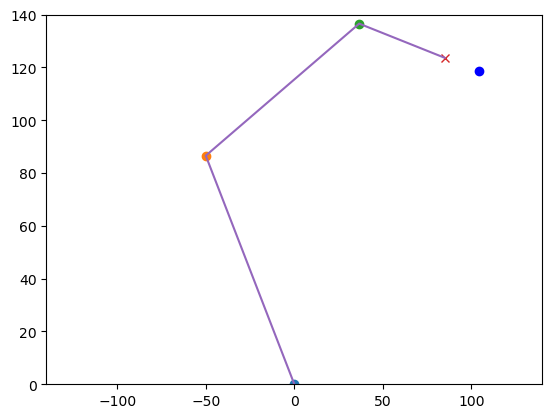

In [17]:
# Para graficar tomamos las coordenadas de los puntos de interés, respecto de la base
x_J1 = Tb1[0,2]
y_J1 = Tb1[1,2]
x_J2 = Tb2[0,2]
y_J2 = Tb2[1,2]
x_ee = Tbee[0,2]
y_ee = Tbee[1,2]
x_objeto = pObjeto_b[0]
y_objeto = pObjeto_b[1]
 
# ya podemos graficar
fig, axes = plt.subplots()
# primero los puntosj
plt.plot(0,0, 'o')
plt.plot(x_J1,y_J1, 'o')
plt.plot(x_J2,y_J2, 'o')
plt.plot(x_ee,y_ee, 'x')
plt.plot(x_objeto, y_objeto, 'bo')
# grafiquemos luego las lineas
plt.plot([0,x_J1,x_J2,x_ee],[0,y_J1,y_J2,y_ee])
# ajustamos los ejes
axes.set_xlim(-140,140)
axes.set_ylim(0,140)
plt.show()